# Part II - Prosper Loan Data Explanatory Analysis
## by Anibaba Ayodeji

## Investigation Overview


> I'm most interested in figuring out what features depict how loans are given out in the dataset, what features contributes to loan disbursement and Amount of loan disbursed



## Dataset Overview

>  This is a Python project script wirtten to perform exploratory and Explanatory data analysis on Prosper Loan Data provided as an option by udacity to pick as a data source. it contains information on peer to peer loans facilitated by credit company Prosper, there are 113,937 loans with 81 variables. For the purpose of this investigation I've taken the following variables:
['Term', 'LoanStatus', 'BorrowerRate','ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus','BorrowerState','Occupation','IsBorrowerHomeowner','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount','LoanOriginationDate','LoanNumber','LoanOriginationQuarter' ,'Recommendations','CurrentDelinquencies', 'Investors']


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_new = pd.read_csv('df_new.csv')
df_new.info()
# df_new['LoanStatus'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27439 entries, 0 to 27438
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 27439 non-null  int64  
 1   index                      27439 non-null  int64  
 2   Term                       27439 non-null  int64  
 3   LoanStatus                 27439 non-null  object 
 4   BorrowerRate               27439 non-null  float64
 5   ProsperRating (numeric)    27439 non-null  float64
 6   ProsperRating (Alpha)      27439 non-null  object 
 7   ProsperScore               27439 non-null  float64
 8   ListingCategory (numeric)  27439 non-null  object 
 9   EmploymentStatus           27439 non-null  object 
 10  BorrowerState              27439 non-null  object 
 11  Occupation                 27412 non-null  object 
 12  IsBorrowerHomeowner        27439 non-null  bool   
 13  DelinquenciesLast7Years    27439 non-null  flo

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## WHATS THE AVERAGE AMOUNT OF LOAN GIVEN

**Majority of the loan/credit given out ranges from $5k - $10k , $5k been the most frequent amount disbursed**


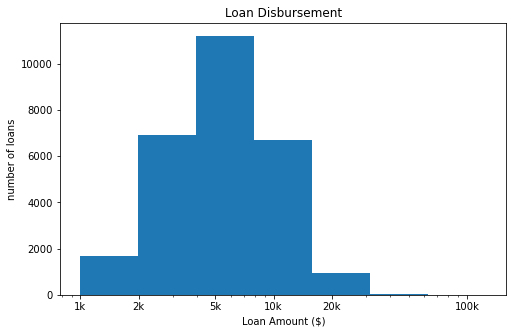

In [3]:
bins =  10 ** np.arange(3, 5+0.3, 0.3)

plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xlabel('Loan Amount ($)')
plt.xticks([ 1e3, 2e3, 5e3, 1e4, 2e4,1e5], ['1k', '2k', '5k', '10k', '20k','100k'])
plt.ylabel('number of loans')
plt.title('Loan Disbursement')

plt.show()

In [4]:
df_new['LoanOriginationDate'] = pd.to_datetime(df_new['LoanOriginationDate'])

## NUMBER OF LOAN DISBURSED OVER TIME

> Disbursement of Loans rose at a steeply growing rate up until 2013 where we witnessed a slight drop in the early part of the year but then rose from there on to set a record breaking disbursement rate up until early 2014 which then disbursement started to reduce drastically.

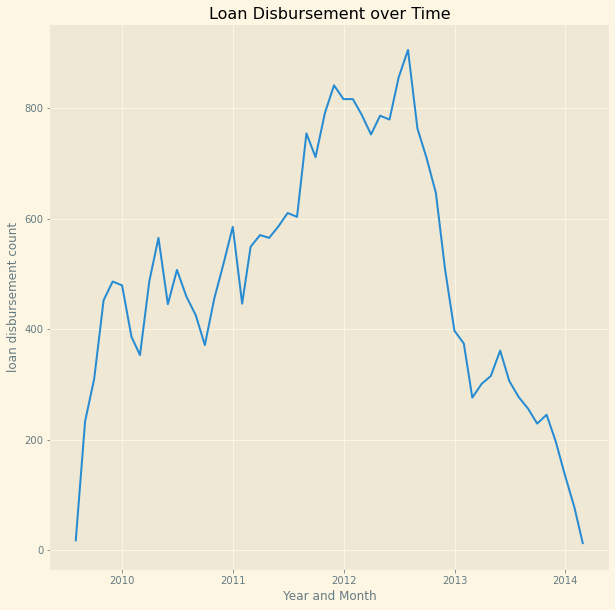

In [5]:
monthly_Loandisb = df_new.groupby(pd.Grouper(key = 'LoanOriginationDate', freq = "M")).count().reset_index()
monthly_Loandisb = monthly_Loandisb[['LoanOriginationDate', 'LoanStatus']]
monthly_Loandisb.head()
monthly_Loandisb.sum()



# Plotting time vs. loan disbursed count
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(10, 10));

    plt.xlabel('Year and Month')
    plt.ylabel('loan disbursement count')

    plt.plot(monthly_Loandisb.LoanOriginationDate, monthly_Loandisb.LoanStatus);
    plt.title('Loan Disbursement over Time');
    
    plt.show()

##  Lets see if my hypothesis of each pair state having the same average 'LoanOriginalAmount' given =alternative hypothesis(what we want to prove to be true), null hypothesis (what is true before any data is collected)

 Considering the Top 5 states in different pairs 6 out of 10 pairs p-Value is closer to 1 meaning we have to stick to our null hypothesis they do not have the same averages which is the truth considering different factors that can affect this like employment status, ecomomy of the state and many more.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

NM vs. TX: Mann-Whitney-Wilcoxon test two-sided, P_val:8.616e-01 U_stat=7.700e+04
TX vs. NJ: Mann-Whitney-Wilcoxon test two-sided, P_val:6.533e-01 U_stat=6.336e+05
NJ vs. MA: Mann-Whitney-Wilcoxon test two-sided, P_val:7.946e-01 U_stat=2.162e+05
MA vs. DC: Mann-Whitney-Wilcoxon test two-sided, P_val:1.176e-01 U_stat=3.264e+04
NM vs. NJ: Mann-Whitney-Wilcoxon test two-sided, P_val:7.277e-01 U_stat=3.713e+04
TX vs. MA: Mann-Whitney-Wilcoxon test two-sided, P_val:9.170e-01 U_stat=4.585e+05
NJ vs. DC: Mann-Whitney-Wilcoxon test two-sided, P_val:7.674e-02 U_stat=4.429e+04
NM vs. MA: Mann-Whitney-Wilcoxon test two-sided, P_val:8.477e-01 U_stat=2.684e+04
TX vs. DC: Mann-Whitney-Wilcoxon test two-sided, P_val:1.072e-01 U_stat=9.414e+04
NM vs. DC: Mann-Whitney-Wilcoxon test two-sided, P_val:3.091e-01 U_stat=5.492e+03

Text(0.5, 1.0, 'State Vs Loan Amount given Statistical Significance')

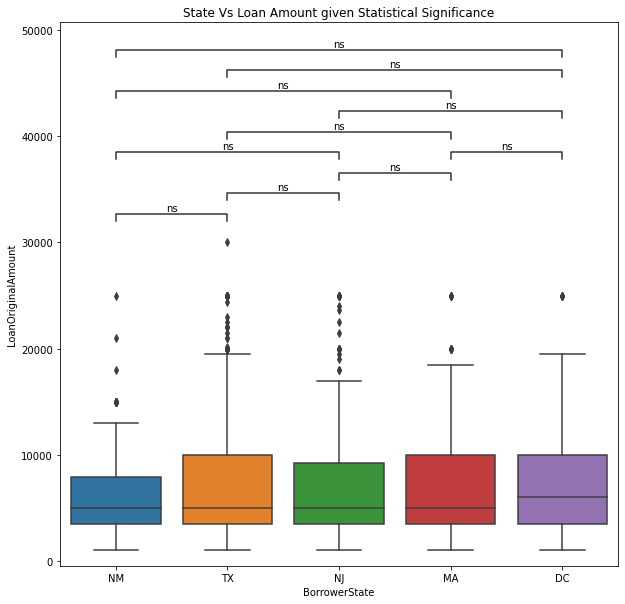

In [6]:
y='LoanOriginalAmount'
x='BorrowerState'
# state=['NM','TX','NJ','MA','DC','HI','RI','IL','VA','AK']
# ax =sb.boxplot(data=df_new, x=x,y=y,order=state)

from itertools import combinations

states = ['NM','TX','NJ','MA','DC']
pairs = list(combinations(states,r=2))

from statannotations.Annotator import Annotator

plt.figure(figsize = [10, 10])

ax =sb.boxplot(data=df_new, x=x,y=y,order=states)
annotator= Annotator(ax, pairs, data=df_new, x=x, y=y, order=states)
annotator.configure(test="Mann-Whitney")
annotator.apply_and_annotate()

plt.title('State Vs Loan Amount given Statistical Significance')


# plt.show()

NM vs. TX: Mann-Whitney-Wilcoxon test two-sided, P_val:8.616e-01 U_stat=7.700e+04
TX vs. NJ: Mann-Whitney-Wilcoxon test two-sided, P_val:6.533e-01 U_stat=6.336e+05
NJ vs. MA: Mann-Whitney-Wilcoxon test two-sided, P_val:7.946e-01 U_stat=2.162e+05
MA vs. DC: Mann-Whitney-Wilcoxon test two-sided, P_val:1.176e-01 U_stat=3.264e+04
NM vs. NJ: Mann-Whitney-Wilcoxon test two-sided, P_val:7.277e-01 U_stat=3.713e+04
TX vs. MA: Mann-Whitney-Wilcoxon test two-sided, P_val:9.170e-01 U_stat=4.585e+05
NJ vs. DC: Mann-Whitney-Wilcoxon test two-sided, P_val:7.674e-02 U_stat=4.429e+04
NM vs. MA: Mann-Whitney-Wilcoxon test two-sided, P_val:8.477e-01 U_stat=2.684e+04
TX vs. DC: Mann-Whitney-Wilcoxon test two-sided, P_val:1.072e-01 U_stat=9.414e+04
NM vs. DC: Mann-Whitney-Wilcoxon test two-sided, P_val:3.091e-01 U_stat=5.492e+03


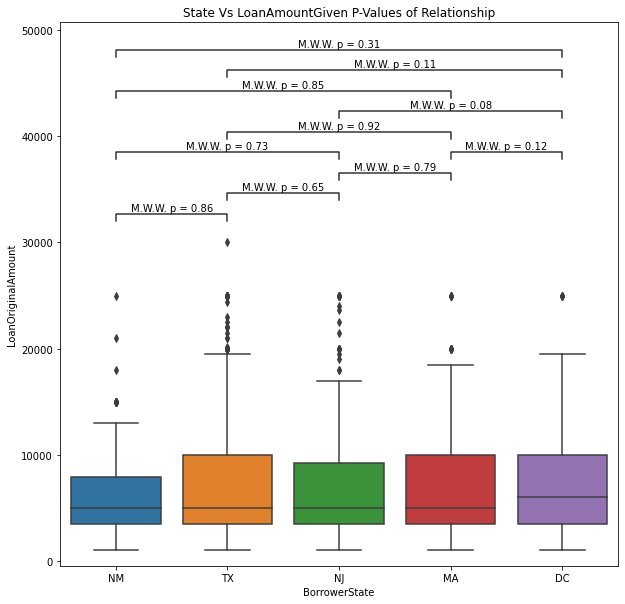

In [7]:
plt.figure(figsize = [10, 10])
ax =sb.boxplot(data=df_new, x=x,y=y,order=states)
annotator= Annotator(ax, pairs, data=df_new, x=x, y=y, order=states)
annotator.configure(test="Mann-Whitney", text_format ='simple')
annotator.apply_and_annotate()

plt.title('State Vs LoanAmountGiven P-Values of Relationship')


plt.show()

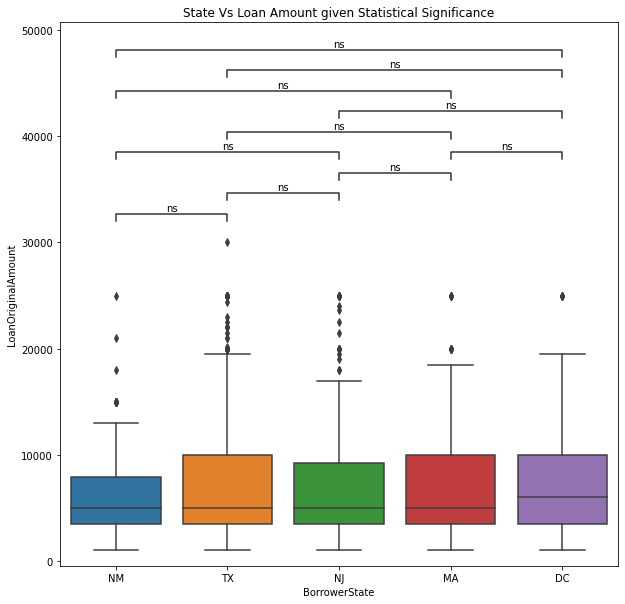

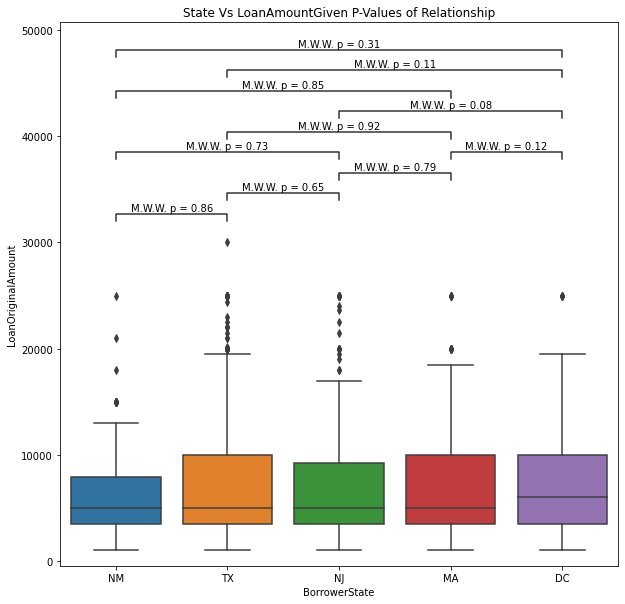

## LoanAmount, Listing Category and LoanStatus Relationship
Across these Listing categories their averages are different except from 'auto' and also i observe that Business reasons have the highest amount recieved loans and completed at the same time which is a good note for our credit system. we can focus more on given people with loan request for Business reasons.

Text(0.5, 1.0, 'LoanAmount vs Listing Category vs LoanStatus')

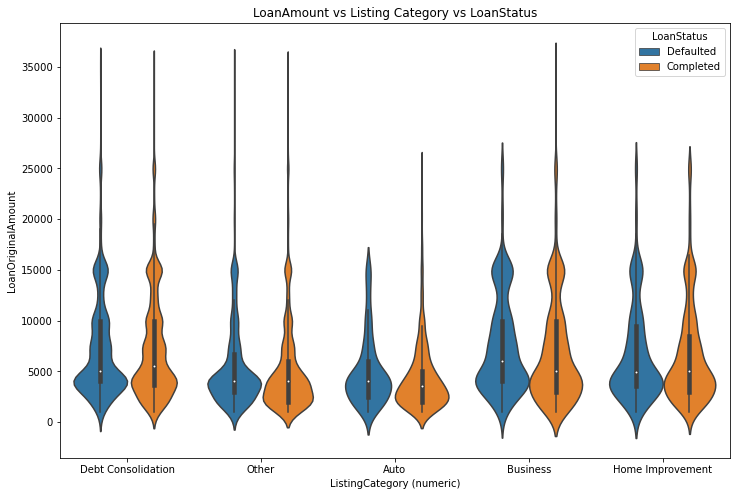

In [8]:
plt.figure(figsize = [12, 8])
sb.violinplot(data=df_new, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');
plt.title('LoanAmount vs Listing Category vs LoanStatus')

In [ ]:
!jupyter nbconvert PresentationSlides.ipynb --to slides --post serve --no-input --no-prompt